## 전국공원
* heatmap
    - 지자체명 vs. 공원구분
    - 평균 공원면적
    - 공원 갯수, 결측치 0처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.tri as mtri
from mpl_toolkits import mplot3d
from matplotlib import font_manager, rc

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [font]+current_font_list
print(matplotlib.rcParams['font.family'])

['HYGothic-Extra', 'sans-serif']


In [2]:
pd_data = pd.read_csv('./park.csv')
pd_data
# pd_data = pd_data.fillna(0, inplace=True)
# pd_data.isna().value_counts()

,지자체명,공원구분,공원명,위도,경도,공원면적,지정고시일
0,서울특별시,소공원,녹색소공원,37.539217,126.962694,1569.9,2012-10-19
1,세종특별자치시,소공원,푸름샘 소공원(소1-1),36.516117,127.233781,1820.0,2011-08-05
2,세종특별자치시,소공원,솔숲 소공원(소1-2),36.508995,127.230040,1037.0,2011-08-05
3,세종특별자치시,수변공원,마디꽃 수변공원(수1-1),36.495962,127.257316,4928.0,2007-07-04
4,세종특별자치시,수변공원,꽃 수변공원(수2-3),36.473133,127.254482,3575.0,2009-01-07
...,...,...,...,...,...,...,...
17576,서울특별시,기타,방배,37.474225,126.995298,210517.2,NaN
17577,서울특별시,기타,말죽거리,37.480885,127.030469,280822.6,NaN
17578,서울특별시,근린공원,서리풀,37.484654,127.000420,465938.3,NaN
17579,서울특별시,근린공원,방배,37.470535,126.989600,74847.6,NaN


C:\Users\ITPS\AppData\Local\Temp\ipykernel_10140\3798665512.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_10140\3798665512.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원면적')


<AxesSubplot: xlabel='공원구분', ylabel='지자체명'>

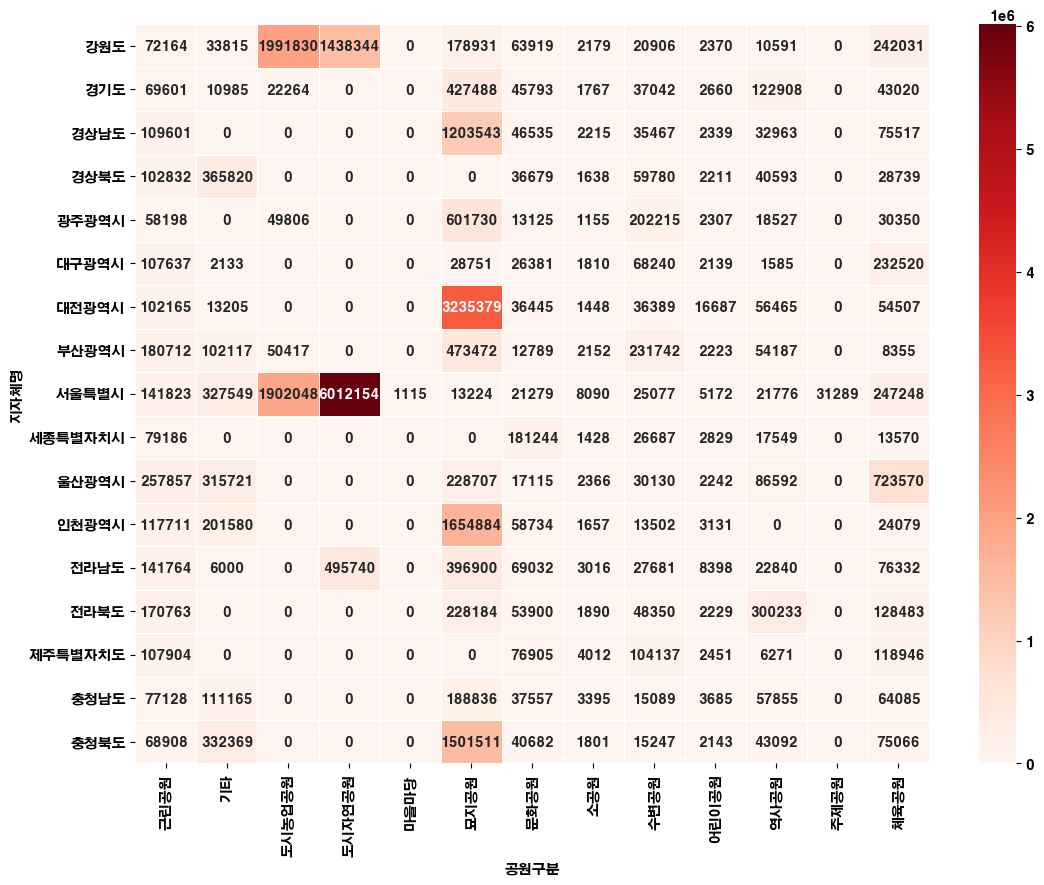

In [3]:
fig = plt.figure(figsize=(6.4*2, 4.8*2))
a = fig.add_subplot()

g1 = pd_data.groupby(['지자체명','공원구분'])
df_group = g1.mean()
df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원면적')
df_group_pv.fillna(0.0, inplace=True)
sns.heatmap(df_group_pv, annot=True, fmt='.0f', linewidths=0.5, cmap='Reds', ax=a)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_10140\2113181093.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원명')


<AxesSubplot: xlabel='공원구분', ylabel='지자체명'>

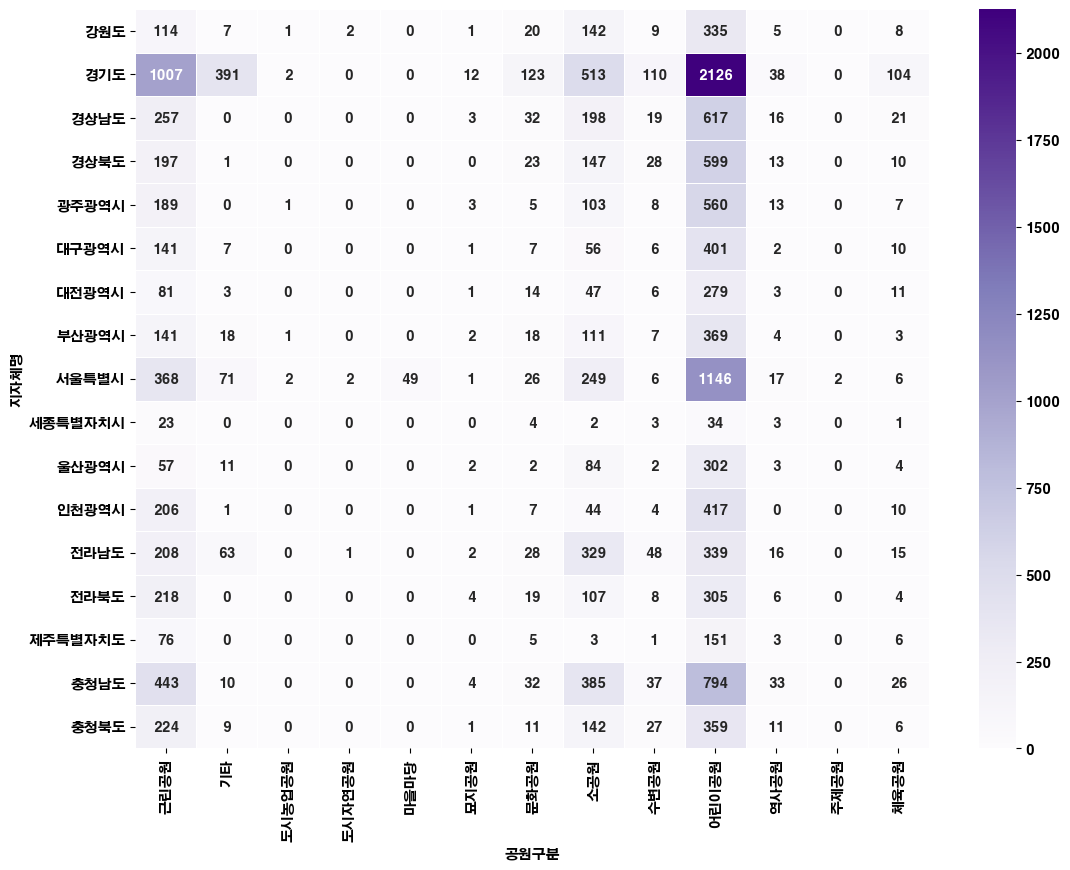

In [4]:
fig1 = plt.figure(figsize=(6.4*2, 4.8*2))
b = fig1.add_subplot()

g2 = pd_data.groupby(['지자체명','공원구분'])
df_group = g1.count()
# df_group
df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원명')
df_group_pv.fillna(0, inplace=True)
sns.heatmap(df_group_pv, annot=True, fmt='.0f', linewidths=0.5, cmap='Purples', ax=b)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_10140\966168371.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()


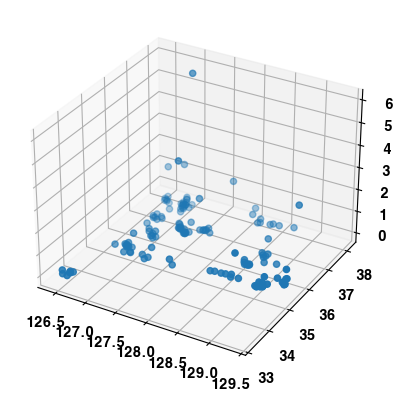

In [9]:
g1 = pd_data.groupby(['지자체명','공원구분'])
df_group = g1.mean()
df_group = df_group.reset_index()
x = df_group['경도']
y = df_group['위도']
z = df_group['공원면적'].astype(np.float64)

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
# z = np.linspace(0, 1, 100)
# x = z * np.sin(25 * z)
# y = z * np.cos(25 * z)
# c = x + y
ax.scatter(x, y, z)